# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Kaiyan Jiang
*   Your **student number**: 1003848189



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

#### 1

In [3]:
## print dataframe
print(df)

       inputs ClimbRate  Sgz     P     Q  ...  DiffSeTime14  Alpha     Se    Goal
0                   -17   -6 -0.03  0.14  ...           0.0    0.6  0.021 -0.0008
1                  -791   15 -0.28 -0.34  ...           0.0    0.4  0.013 -0.0009
2                   -46   48 -0.42  0.07  ...           0.0    0.5  0.019 -0.0005
3                   496   -5 -0.21 -0.04  ...           0.0    0.5  0.017 -0.0005
4                  -124   16 -0.02  0.05  ...           0.0    0.5  0.018 -0.0006
...                 ...  ...   ...   ...  ...           ...    ...    ...     ...
13745               -53  -13 -0.07  0.02  ...           0.0    0.5  0.019 -0.0007
13746                 1    4 -0.11 -0.07  ...           0.0    0.5  0.016 -0.0004
13747               425  -14  0.40  0.07  ...           0.0    0.9  0.032 -0.0015
13748               102  -10 -0.19  0.08  ...           0.0    1.4  0.051 -0.0015
13749              -165   52  0.08  0.42  ...           0.0    0.9  0.034 -0.0018

[13750 rows x 4

#### 2

In [5]:
## Split data
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:40]
y = df.iloc[:,40]
x_train, x1, y_train, y1 = train_test_split(x, y, test_size=0.3, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x1, y1, test_size=0.5, random_state=1)

In [7]:
## Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)

x_val_std = scaler.transform(x_val)

x_test_std = scaler.transform(x_test)

In [8]:
## Insert First Column
X_train = np.column_stack([np.ones((len(x_train_std),1)),x_train_std])
X_val = np.column_stack([np.ones((len(x_val_std),1)),x_val_std])
X_test = np.column_stack([np.ones((len(x_test_std),1)),x_test_std])

#### 3

Iteration is each time that updates the weights, and epochs is each time that learns the whole dataset.  

In full gradient descent, we train the whole dataset as one package. So at each time we update the weights, we train the whole data. That is one epoch is one iteration.  

In Mini-batch gradient descent, we break the dataset in to k small batchs. We train the small batchs separately, so the weights will be updated by k times. Hence, in mini-batch gradient descent, one epoch takes k iterations.  

In Stochastic gradient descent(SGD), each sample is a batch, so the total number of batch is the number of samples. We train these batchs separaly that update the weights by the number of samples times. Hence, in SGD, one epoch contains the number of sampels iterations.  

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [9]:
from sklearn.metrics import mean_squared_error
import scipy as scipy

## Direct Solution
W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)).reshape(-1,1)

## Prediction
y_pred = np.dot(X_train, W)

In [10]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [11]:
## RMSE
from sklearn.metrics import mean_squared_error
RMSE_train = rmse(y_pred, y_train)

y_pred_val = np.dot(X_val, W)
RMSE_val = rmse(y_pred_val, y_val)

print("The root-mean-square error (RMSE) for training set is", RMSE_train)
print("The root-mean-square error (RMSE) for validation set is", RMSE_val)

The root-mean-square error (RMSE) for training set is 0.00017707758079743764
The root-mean-square error (RMSE) for validation set is 0.00017415588907568788


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [22]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
w = np.random.uniform(high=0.001, size=41) 
lr = 0.01
threshold = RMSE_val*1.001
rmse_train = []
rmse_val = []

for epoch in range(0,1000):
  ypred_train = np.dot(X_train,w.T)
  rmse_train.append(rmse(ypred_train,y_train.to_numpy()))
  gradient = 1/len(ypred_train)*np.dot(X_train.T, ypred_train-y_train.to_numpy())
  w = w - lr * gradient
  ypred_val = np.dot(X_val,w.T)
  rmse_val.append(rmse(ypred_val,y_val.to_numpy()))

  if threshold >= rmse(ypred_val,y_val.to_numpy()):
    break

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 1.3715295791625977 (s) ---


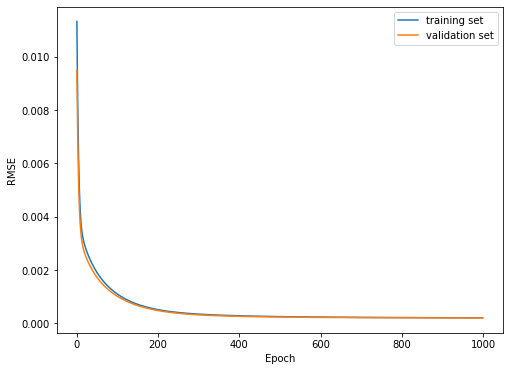

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(rmse_train, label ="training set")
plt.plot(rmse_val, label = "validation set")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The model is underfitting at the beginning, as we can observe the curve of RMSE of training set is above the curve of RMSE of the valdiation set. As the number of epochs goes up, more specificly over 500, the underfitting diminishes. The curve of training set RMSE and the curve of validation set RMSE overlaps. The model now fits well.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [37]:
import math
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

## Code From: https://stackoverflow.com/questions/4983258/python-how-to-check-list-monotonicity

In [38]:
def mini_batch (train_set, train_target, val_set, val_target, batch_size, lr, CT):
  start_time = time.time()

  w = np.random.uniform(high=0.001, size=41)

  rmse_train = []
  rmse_val = []
  time_list = []
 
  train_target= np.array(train_target)
  val_target = np.array(val_target)

  total_batch = math.ceil(train_set.shape[0]/batch_size)

  for epoch in range(0, 20000):
    
    for n in range(0,total_batch):
      if (n+1)*batch_size > train_set.shape[0]:
        end = len(train_set)
      else:
        end = (n+1)*batch_size

      ypred = np.dot(train_set[n*batch_size:end],w.T)
      gradient = 1/len(ypred)*np.dot(train_set[n*batch_size:end].T,ypred-train_target[n*batch_size:end])
      w = w - lr * gradient

    ypred_train = np.dot(train_set,w.T)
    rmse_train.append(rmse(ypred_train,train_target))
    if len(rmse_train)>=10 and strictly_increasing(rmse_train[5:]):
      break

    ypred_val = np.dot(val_set,w.T)
    rmse_val.append(rmse(ypred_val,val_target))
    if len(rmse_val)>=10 and strictly_increasing(rmse_val[5:]):
      break

    time_list.append(time.time()-start_time)

    p_train = np.random.permutation(train_set.shape[0])
    train_set, train_target = train_set[p_train], train_target[p_train]  

    if CT >= rmse(ypred_val,val_target):
      break

  return w, rmse_train, rmse_val, time_list

In [39]:
threshold = RMSE_val*1.001

In [40]:
w_1, rmse_train_1, rmse_val_1, time_list_1 = mini_batch(X_train, y_train, X_val, y_val, 1, 0.01, threshold)

w_2, rmse_train_2, rmse_val_2, time_list_2 = mini_batch(X_train, y_train, X_val, y_val, 2, 0.01, threshold)

w_4, rmse_train_4, rmse_val_4, time_list_4 = mini_batch(X_train, y_train, X_val, y_val, 4, 0.01, threshold)

w_8, rmse_train_8, rmse_val_8, time_list_8 = mini_batch(X_train, y_train, X_val, y_val, 8, 0.01, threshold)

w_16, rmse_train_16, rmse_val_16, time_list_16 = mini_batch(X_train, y_train, X_val, y_val, 16, 0.01, threshold)

w_32, rmse_train_32, rmse_val_32, time_list_32 = mini_batch(X_train, y_train, X_val, y_val, 32, 0.01, threshold)

w_64, rmse_train_64, rmse_val_64, time_list_64 = mini_batch(X_train, y_train, X_val, y_val, 64, 0.01, threshold)

w_128, rmse_train_128, rmse_val_128, time_list_128 = mini_batch(X_train, y_train, X_val, y_val, 128, 0.01, threshold)

w_256, rmse_train_256, rmse_val_256, time_list_256 = mini_batch(X_train, y_train, X_val, y_val, 256, 0.01, threshold)

w_512, rmse_train_512, rmse_val_512, time_list_512 = mini_batch(X_train, y_train, X_val, y_val, 512, 0.01, threshold)

w_1024, rmse_train_1024, rmse_val_1024, time_list_1024 = mini_batch(X_train, y_train, X_val, y_val, 1024, 0.01, threshold)

In [41]:
## Determine Converge
Batch_size = [1,2,4,8,16,32,64,128,256,512,1024]
List = [rmse_val_1[-1],rmse_val_2[-1],rmse_val_4[-1],rmse_val_8[-1],rmse_val_16[-1],
        rmse_val_32[-1],rmse_val_64[-1],rmse_val_128[-1],rmse_val_256[-1],rmse_val_512[-1],
        rmse_val_1024[-1]]
Converge = [List[i]<= threshold for i in range(0,11)]
idx = [i for i, n in enumerate(Converge) if n == True]
Batch_size = [Batch_size[idx[i]] for i in range(len(idx))]
print("The converging batch sizes are:", Batch_size)

The converging batch sizes are: [64, 128, 256, 512, 1024]


In [46]:
## Number of Epochs
Number = [len(rmse_val_64),len(rmse_val_128),len(rmse_val_256),len(rmse_val_512),len(rmse_val_1024)]
print("The number of epochs for different batch sizes are:", Number)

The number of epochs for different batch sizes are: [78, 68, 1213, 758, 742]


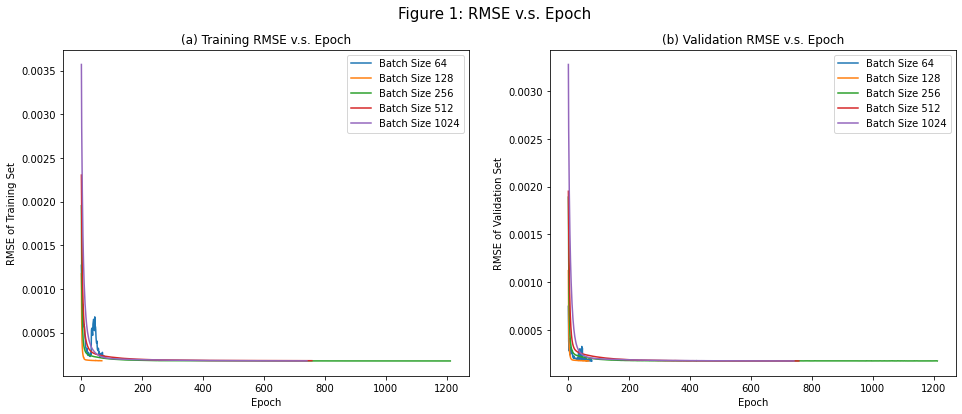

In [53]:
fig, axs =  plt.subplots(1,2, figsize = (16,6))

axs[0].plot(rmse_train_64, label ="Batch Size 64")
axs[0].plot(rmse_train_128, label ="Batch Size 128")
axs[0].plot(rmse_train_256,label = "Batch Size 256")
axs[0].plot(rmse_train_512,label = "Batch Size 512")
axs[0].plot(rmse_train_1024,label = "Batch Size 1024")
axs[0].legend(loc = "upper right")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("RMSE of Training Set")
axs[0].set_title("(a) Training RMSE v.s. Epoch")

axs[1].plot(rmse_val_64, label ="Batch Size 64")
axs[1].plot(rmse_val_128, label ="Batch Size 128")
axs[1].plot(rmse_val_256,label = "Batch Size 256")
axs[1].plot(rmse_val_512,label = "Batch Size 512")
axs[1].plot(rmse_val_1024,label = "Batch Size 1024")
axs[1].legend(loc = "upper right")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("RMSE of Validation Set")
axs[1].set_title("(b) Validation RMSE v.s. Epoch")

plt.suptitle("Figure 1: RMSE v.s. Epoch",size=15)
plt.show()

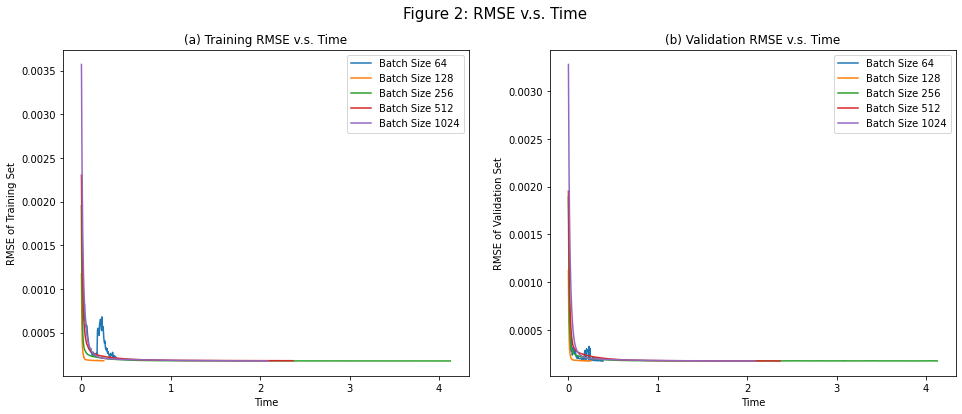

In [43]:
fig, axs =  plt.subplots(1,2, figsize = (16,6))

axs[0].plot(time_list_64, rmse_train_64, label ="Batch Size 64")
axs[0].plot(time_list_128, rmse_train_128, label ="Batch Size 128")
axs[0].plot(time_list_256, rmse_train_256, label = "Batch Size 256")
axs[0].plot(time_list_512, rmse_train_512, label = "Batch Size 512")
axs[0].plot(time_list_1024, rmse_train_1024, label = "Batch Size 1024")
axs[0].legend(loc = "upper right")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("RMSE of Training Set")
axs[0].set_title("(a) Training RMSE v.s. Time")

axs[1].plot(time_list_64, rmse_val_64, label ="Batch Size 64")
axs[1].plot(time_list_128, rmse_val_128, label ="Batch Size 128")
axs[1].plot(time_list_256, rmse_val_256, label = "Batch Size 256")
axs[1].plot(time_list_512, rmse_val_512, label = "Batch Size 512")
axs[1].plot(time_list_1024, rmse_val_1024, label = "Batch Size 1024")
axs[1].legend(loc = "upper right")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("RMSE of Validation Set")
axs[1].set_title("(b) Validation RMSE v.s. Time")

plt.suptitle("Figure 2: RMSE v.s. Time",size=15)
plt.show()

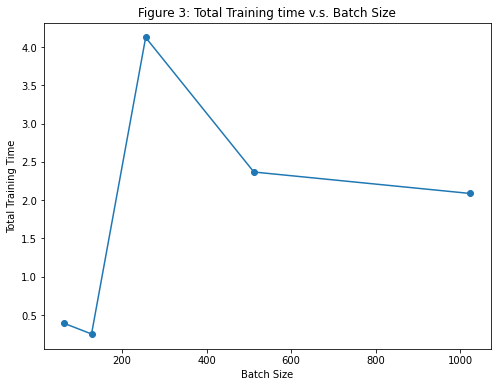

In [52]:
training_time_list = [time_list_64[-1],time_list_128[-1],time_list_256[-1],
                      time_list_512[-1],time_list_1024[-1]]
batchsize = [64,128,256,512,1024]

plt.figure(figsize=(8,6))
plt.plot(batchsize,training_time_list, "o-")
plt.xlabel("Batch Size")
plt.ylabel("Total Training Time")
plt.title("Figure 3: Total Training time v.s. Batch Size")
plt.show()

In [47]:
print("The converging batch sizes are:", Batch_size)
print("The number of epochs for different batch sizes are:", Number)

The converging batch sizes are: [64, 128, 256, 512, 1024]
The number of epochs for different batch sizes are: [78, 68, 1213, 758, 742]


From all models fitted, when batch size equals to 64, 128, 256, 512, 1024, our gradient descent converges. And the corresponding epoch numbers are 78, 68, 1213, 758, 742.  

From Figure1, we can see that for converging batch sizes, the RMSE both of training set and validation set decreases very fast with epochs. But when batch size equals to 64, there are some fluctuations of RMSE.

Same as Figure1, in Figure2, the RMSE of training set and the RMSE of validation set also dimishes sharply with time.  

In Figure3, we plot the total training time with converging batch size. We can observe that the total time will larger when the number of epochs are bigger. Thus, there might be a positive relationship between number of epochs and total training time.  


## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [54]:
def momentum_batch (train_set, train_target, val_set, val_target, batch_size, lr, momentum, CT):
  start_time = time.time()
  
  w = np.random.uniform(high=0.001, size=41)

  rmse_train = []
  rmse_val = []
  time_list = []
  gradient = [0]
 
  train_target= np.array(train_target)
  val_target = np.array(val_target)

  total_batch = math.ceil(train_set.shape[0]/batch_size)

  for epoch in range(0,20000):    

    for n in range(0,total_batch):
      if (n+1)*batch_size > train_set.shape[0]:
        end = len(train_set)
      else:
        end = (n+1)*batch_size

      ypred = np.dot(train_set[n*batch_size:end],w.T)
      derivative = 1/len(ypred)*np.dot(train_set[n*batch_size:end].T,ypred-train_target[n*batch_size:end])

      add = momentum*gradient[-1]+(1-momentum)*derivative
      gradient.append(add)

      w = w - lr * gradient[-1]

    ypred_train = np.dot(train_set,w.T)
    rmse_train.append(rmse(ypred_train,train_target))
    if len(rmse_train)>=10 and strictly_increasing(rmse_train[5:]):
      break

    ypred_val = np.dot(val_set,w.T)
    rmse_val.append(rmse(ypred_val,val_target))
    if len(rmse_val)>=10 and strictly_increasing(rmse_val[5:]):
      break

    time_list.append(time.time()-start_time)

    p_train = np.random.permutation(train_set.shape[0])
    train_set, train_target = train_set[p_train], train_target[p_train]

    if CT >= rmse(ypred_val,val_target):
      break

  return w, rmse_train, rmse_val, time_list

In [55]:
threshold = RMSE_val*1.001
Result = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0, threshold)
Result1 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.05, threshold)
Result2 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.1, threshold)
Result3 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.35, threshold)
Result4 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.5, threshold)
Result5 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.675, threshold)
Result6 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.78, threshold)
Result7 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.8133, threshold)
Result8 = momentum_batch(X_train, y_train, X_val, y_val, 128, 0.01, 0.99, threshold)

In [56]:
## Determine Converge
Momentum_Coeff = [0, 0.05, 0.1, 0.35, 0.5, 0.675, 0.78, 0.8133, 0.99]
List = [Result[2][-1],Result1[2][-1],Result2[2][-1],Result3[2][-1],Result4[2][-1],
        Result5[2][-1],Result6[2][-1],Result7[2][-1],Result8[2][-1]]
Converge = [List[i]<= threshold for i in range(0,9)]
idx = [i for i, n in enumerate(Converge) if n == True]
Momentum_Coeff = [Momentum_Coeff[idx[i]] for i in range(len(idx))]
print("The momentun coefficient that converges are:", Momentum_Coeff)

The momentun coefficient that converges are: [0, 0.05, 0.1, 0.35, 0.5, 0.675, 0.78, 0.8133, 0.99]


In [58]:
epo = [len(Result[2]),len(Result1[2]),len(Result2[2]),len(Result3[2]),len(Result4[2]),
       len(Result5[2]),len(Result6[2]),len(Result7[2]),len(Result8[2])]
print("The number of epochs with different momentum coefficient:", epo)

The number of epochs with different momentum coefficient: [99, 99, 279, 440, 110, 84, 109, 237, 117]


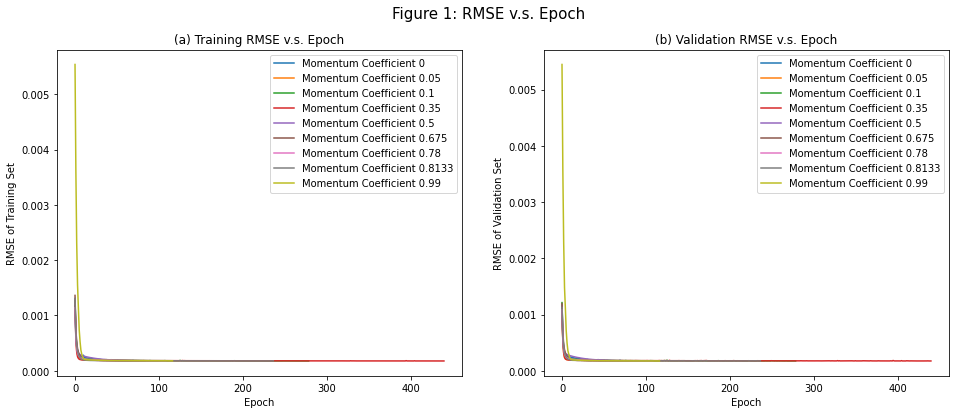

In [59]:
fig, axs =  plt.subplots(1,2, figsize = (16,6))

axs[0].plot(Result[1], label ="Momentum Coefficient 0")
axs[0].plot(Result1[1], label ="Momentum Coefficient 0.05")
axs[0].plot(Result2[1], label ="Momentum Coefficient 0.1")
axs[0].plot(Result3[1],label = "Momentum Coefficient 0.35")
axs[0].plot(Result4[1],label = "Momentum Coefficient 0.5")
axs[0].plot(Result5[1],label = "Momentum Coefficient 0.675")
axs[0].plot(Result6[1],label = "Momentum Coefficient 0.78")
axs[0].plot(Result7[1],label = "Momentum Coefficient 0.8133")
axs[0].plot(Result8[1],label = "Momentum Coefficient 0.99")
axs[0].legend(loc = "upper right")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("RMSE of Training Set")
axs[0].set_title("(a) Training RMSE v.s. Epoch")

axs[1].plot(Result[2], label ="Momentum Coefficient 0")
axs[1].plot(Result1[2], label ="Momentum Coefficient 0.05")
axs[1].plot(Result2[2], label ="Momentum Coefficient 0.1")
axs[1].plot(Result3[2],label = "Momentum Coefficient 0.35")
axs[1].plot(Result4[2],label = "Momentum Coefficient 0.5")
axs[1].plot(Result5[2],label = "Momentum Coefficient 0.675")
axs[1].plot(Result6[2],label = "Momentum Coefficient 0.78")
axs[1].plot(Result7[2],label = "Momentum Coefficient 0.8133")
axs[1].plot(Result8[2],label = "Momentum Coefficient 0.99")
axs[1].legend(loc = "upper right")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("RMSE of Validation Set")
axs[1].set_title("(b) Validation RMSE v.s. Epoch")

plt.suptitle("Figure 1: RMSE v.s. Epoch",size=15)
plt.show()

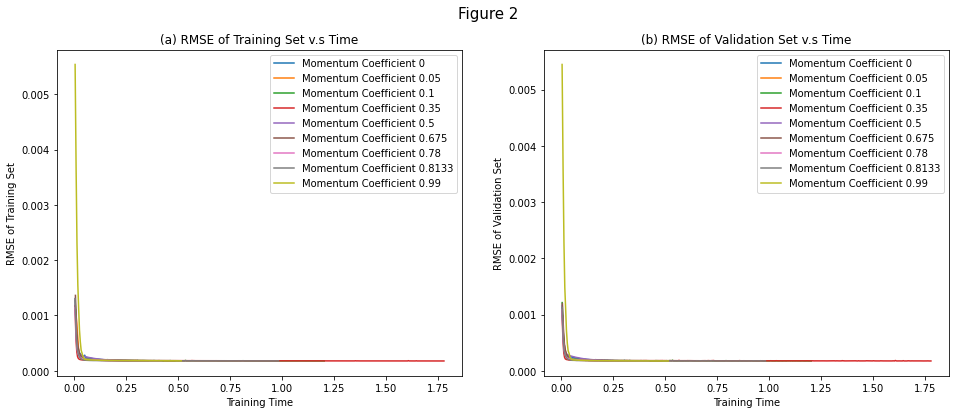

In [64]:
fig, axs =  plt.subplots(1,2, figsize = (16,6))

axs[0].plot(Result[3], Result[1], label ="Momentum Coefficient 0")
axs[0].plot(Result1[3], Result1[1], label ="Momentum Coefficient 0.05")
axs[0].plot(Result2[3], Result2[1], label ="Momentum Coefficient 0.1")
axs[0].plot(Result3[3], Result3[1], label = "Momentum Coefficient 0.35")
axs[0].plot(Result4[3], Result4[1], label = "Momentum Coefficient 0.5")
axs[0].plot(Result5[3], Result5[1], label = "Momentum Coefficient 0.675")
axs[0].plot(Result6[3], Result6[1], label = "Momentum Coefficient 0.78")
axs[0].plot(Result7[3], Result7[1], label = "Momentum Coefficient 0.8133")
axs[0].plot(Result8[3], Result8[1], label = "Momentum Coefficient 0.99")
axs[0].legend(loc = "upper right")
axs[0].set_ylabel("RMSE of Training Set")
axs[0].set_xlabel("Training Time")
axs[0].set_title("(a) RMSE of Training Set v.s Time")

axs[1].plot(Result[3], Result[2], label ="Momentum Coefficient 0")
axs[1].plot(Result1[3], Result1[2], label ="Momentum Coefficient 0.05")
axs[1].plot(Result2[3], Result2[2], label ="Momentum Coefficient 0.1")
axs[1].plot(Result3[3], Result3[2], label = "Momentum Coefficient 0.35")
axs[1].plot(Result4[3], Result4[2], label = "Momentum Coefficient 0.5")
axs[1].plot(Result5[3], Result5[2], label = "Momentum Coefficient 0.675")
axs[1].plot(Result6[3], Result6[2], label = "Momentum Coefficient 0.78")
axs[1].plot(Result7[3], Result7[2], label = "Momentum Coefficient 0.8133")
axs[1].plot(Result8[3], Result8[2], label = "Momentum Coefficient 0.99")
axs[1].legend(loc = "upper right")
axs[1].set_ylabel("RMSE of Validation Set")
axs[1].set_xlabel("Training Time")
axs[1].set_title("(b) RMSE of Validation Set v.s Time")


plt.suptitle("Figure 2",size=15)
plt.show()

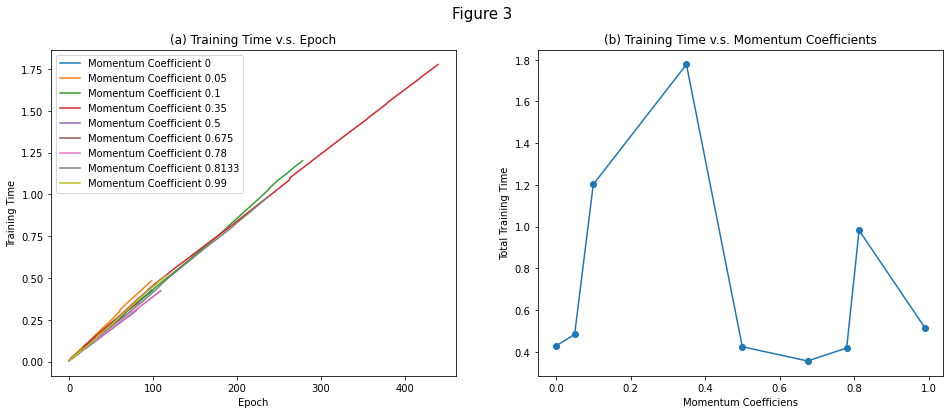

In [66]:
Momentum_Coeff = [0, 0.05, 0.1, 0.35, 0.5, 0.675, 0.78, 0.8133, 0.99]
Time = [Result[3][-1],Result1[3][-1],Result2[3][-1],Result3[3][-1],Result4[3][-1],
        Result5[3][-1],Result6[3][-1],Result7[3][-1],Result8[3][-1]]

fig, axs =  plt.subplots(1,2, figsize = (16,6))

axs[0].plot(Result[3], label ="Momentum Coefficient 0")
axs[0].plot(Result1[3], label ="Momentum Coefficient 0.05")
axs[0].plot(Result2[3], label ="Momentum Coefficient 0.1")
axs[0].plot(Result3[3],label = "Momentum Coefficient 0.35")
axs[0].plot(Result4[3],label = "Momentum Coefficient 0.5")
axs[0].plot(Result5[3],label = "Momentum Coefficient 0.675")
axs[0].plot(Result6[3],label = "Momentum Coefficient 0.78")
axs[0].plot(Result7[3],label = "Momentum Coefficient 0.8133")
axs[0].plot(Result8[3],label = "Momentum Coefficient 0.99")
axs[0].legend(loc = "upper left")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Training Time")
axs[0].set_title("(a) Training Time v.s. Epoch")

axs[1].plot(Momentum_Coeff,Time,"o-")
axs[1].set_xlabel("Momentum Coefficiens")
axs[1].set_ylabel("Total Training Time")
axs[1].set_title("(b) Training Time v.s. Momentum Coefficients")

plt.suptitle("Figure 3", size=15)
plt.show()

In [62]:
print("The momentun coefficient that converges are:", Momentum_Coeff)
print("The number of epochs with different momentum coefficient:", epo)

The momentun coefficient that converges are: [0, 0.05, 0.1, 0.35, 0.5, 0.675, 0.78, 0.8133, 0.99]
The number of epochs with different momentum coefficient: [99, 99, 279, 440, 110, 84, 109, 237, 117]


From Part(4), when batch size equals to 128, the total training time is the least. So in this part, I choose batch size equals to 128 for all models.  

The models varies the momentum coefficient from [0, 0.05, 0.1, 0.35, 0.5, 0.675, 0.78, 0.8133, 0.99], with corresponding epoch numbers: [99, 99, 279, 440, 110, 84, 109, 237, 117]. And our results shows that model converges for all momentum coefficient.  

In figure1, the RMSE converges very fast with the epochs. From all models, when the momentum coefficient equals to 0.99, it has a larger RMSE for both training and validation set than others.  

In figure2 and figure3, RMSE decrease sharply with training time. And we can see there is a positive relationship between training time and epoch, and it is very close to linear. And there is no obvious relationship between momentum coefficients and time.  

After adding the momentum coefficient, the total training time are less than in part(4), and the number of epochs is also less. However, this is not certain, because we selected the initial weight by random. 

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [71]:
ypred_test = np.dot(X_test, Result5[0].T)
RMSE = rmse(ypred_test,y_test)
RMSEtrain = rmse(np.dot(X_train, Result5[0].T), y_train)
print("The root-mean-square-error of training set is:", RMSEtrain, "when batch size is 128 and momentum coefficient is 0.675")
print("The root-mean-square-error of test set is:", RMSE, "when batch size is 128 and momentum coefficient is 0.675")

The root-mean-square-error of training set is: 0.00017857724842394694 when batch size is 128 and momentum coefficient is 0.675
The root-mean-square-error of test set is: 0.00016843312362192035 when batch size is 128 and momentum coefficient is 0.675


From part(5), although it is not certain, but adding a momentum coefficient could reduce the training time and number of epochs, so a gradient descent with momentum is selected in this part.  

From both part4 and 5, the RMSE reduces very fast for converging models. So training time will be another factor to consider. 

In part(4), from all converging batch size, batch size of 128 has the lowest training time. And in part(5), when momentum coefficient equals to 0.675, the training time is minimum.  

So I think the mini-batch gradient descent model with batch size of 128 and momentum coefficient of 0.675 will be the best model from all model before.  

Apply this model to our test set, the root-mean-square-error is 0.00016843312362192035.  

The RMSE is very small, so I think the model generates the task well.  